<a href="https://colab.research.google.com/github/avirupk/ML-Playlist/blob/main/Logistic_Regression_Excercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Example in Logistics Regression**

In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [248]:
df = pd.read_csv("HR_comma_sep.csv")
display(df.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [249]:
 left=df[df.left==1]
 left.shape

(3571, 10)

In [250]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [251]:
df.groupby("left").mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Here we can use satisfaction_level ,	average_montly_hours	, promotion_last_5years   as independent variable**

In [252]:
df.drop(["last_evaluation","number_project","time_spend_company","Work_accident"],axis=1,inplace=True)

In [253]:
df

,satisfaction_level,average_montly_hours,left,promotion_last_5years,Department,salary
0,0.38,157,1,0,sales,low
1,0.80,262,1,0,sales,medium
2,0.11,272,1,0,sales,medium
3,0.72,223,1,0,sales,low
4,0.37,159,1,0,sales,low
...,...,...,...,...,...,...
14994,0.40,151,1,0,support,low
14995,0.37,160,1,0,support,low
14996,0.37,143,1,0,support,low
14997,0.11,280,1,0,support,low


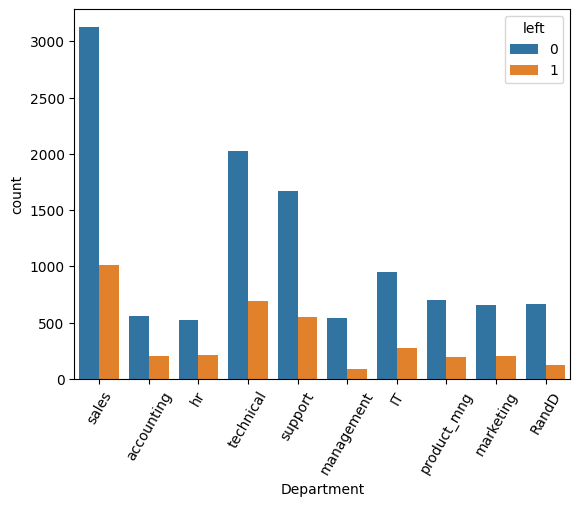

In [254]:
sns.countplot(x="Department", data=df, hue="left")
plt.xticks(rotation=60)
plt.show()

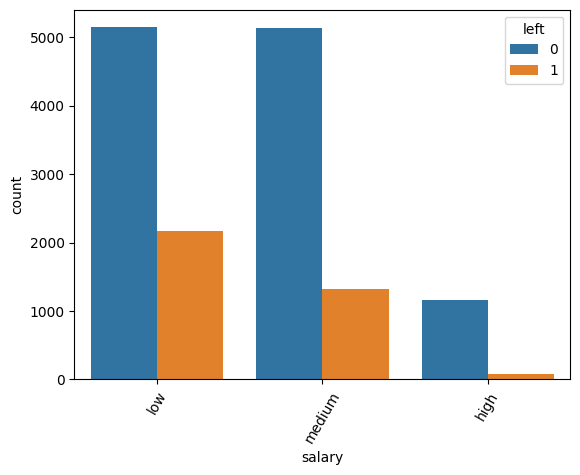

In [255]:
sns.countplot(x="salary", data=df, hue="left")
plt.xticks(rotation=60)
plt.show()

# **From the data analysis so far we can conclude that we will use following variables as independant variables in our model**
**Satisfaction Level**<br>
**Average Monthly Hours**<br>
**Promotion Last 5 Years**<br>
**Salary**

In [256]:
subdf=df[["satisfaction_level",
"average_montly_hours",
"promotion_last_5years"
,"salary"]]

In [257]:
dummies_subdf=pd.get_dummies(df.salary,prefix="salary",dtype=int)
dummies_subdf

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [258]:
subdf=pd.concat([subdf,dummies_subdf],axis=1)
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [259]:
subdf.drop("salary",axis=1,inplace=True)


In [260]:
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [261]:
subdf.drop("salary_medium",axis=1,inplace=True)


In [262]:
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [263]:
X=subdf
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [264]:
Y=df.left
Y

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [265]:
from sklearn.model_selection import train_test_split


In [266]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [267]:
from sklearn.linear_model import LogisticRegression


In [268]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [269]:
model.predict(X_test)

array([0, 1, 0, ..., 1, 0, 0])

In [270]:
Y_test

,left
12425,1
1785,1
4536,0
11025,0
14331,1
...,...
2993,0
9495,0
12056,1
14202,0


In [271]:
model.score(X_test,Y_test)

0.7816